# Modelling butterfly wing eyespot patterns

In [1]:
import scipy
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import animation
from matplotlib import pyplot as plt
from IPython.display import HTML

## Studying 2D laplacian :
here we use the 2D heat equation to try laplacian diffusion in 2D using the [finite difference method](https://en.wikipedia.org/wiki/Finite_difference_method#Example:_The_Laplace_operator)
$$
\begin{align*}
\frac{\partial u}{\partial t} &= \sigma (\frac{\partial^{2} u}{\partial^{2} x}+\frac{\partial^{2} u}{\partial^{2} x})\\
\Leftrightarrow \frac{\partial u}{\partial t}&=\sigma\nabla u
\end{align*}
$$

In [2]:
def Diffuse_w_Neumann_BC_2D(t, u, shape, h, sigma):
    u = u.reshape(shape)
    coeff = sigma / h ** 2

    stencil = coeff * np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    return scipy.ndimage.convolve(u, stencil, mode='constant').flatten()


In [21]:
def periodic_IC(x, k):
    return (1. + np.cos(2.*k*np.pi*x)) / 2.

In [3]:
def random_IC(x):
    return np.random.rand(x.shape[0], x.shape[1])

In [22]:
# time parameters
time_begin = 0.
time_end = 5.
time_span = (time_begin, time_end)
number_pts = 200
time_eval = np.linspace(time_begin, time_end, number_pts)

# space parameters
M = 40
x = np.linspace(0., 1., (M + 2) ** 2).reshape(M + 2, M + 2)
h = 1. / (M + 1.)

# physical parameter
sigma = 0.02

# initial condition
f = periodic_IC(x, np.pi)
# f = random_IC(x)


sol = solve_ivp(Diffuse_w_Neumann_BC_2D, time_span, f.flatten(), args=(f.shape, h, sigma), t_eval=time_eval)
sol.y

array([[1.00000000e+00, 2.93097741e-01, 1.45744837e-01, ...,
        7.17861288e-04, 7.11051779e-04, 7.04611761e-04],
       [9.99968661e-01, 4.47035948e-01, 2.52029429e-01, ...,
        1.43058816e-03, 1.41841339e-03, 1.40573726e-03],
       [9.99874646e-01, 5.02465593e-01, 3.09849184e-01, ...,
        2.13818800e-03, 2.11790714e-03, 2.09872836e-03],
       ...,
       [8.23459143e-01, 4.87976431e-01, 3.37969721e-01, ...,
        2.14792445e-03, 2.12724292e-03, 2.10783687e-03],
       [8.19170008e-01, 4.32994512e-01, 2.73977355e-01, ...,
        1.43688753e-03, 1.42469631e-03, 1.41189286e-03],
       [8.14840863e-01, 2.82452071e-01, 1.58202327e-01, ...,
        7.21135489e-04, 7.14190313e-04, 7.07673786e-04]])

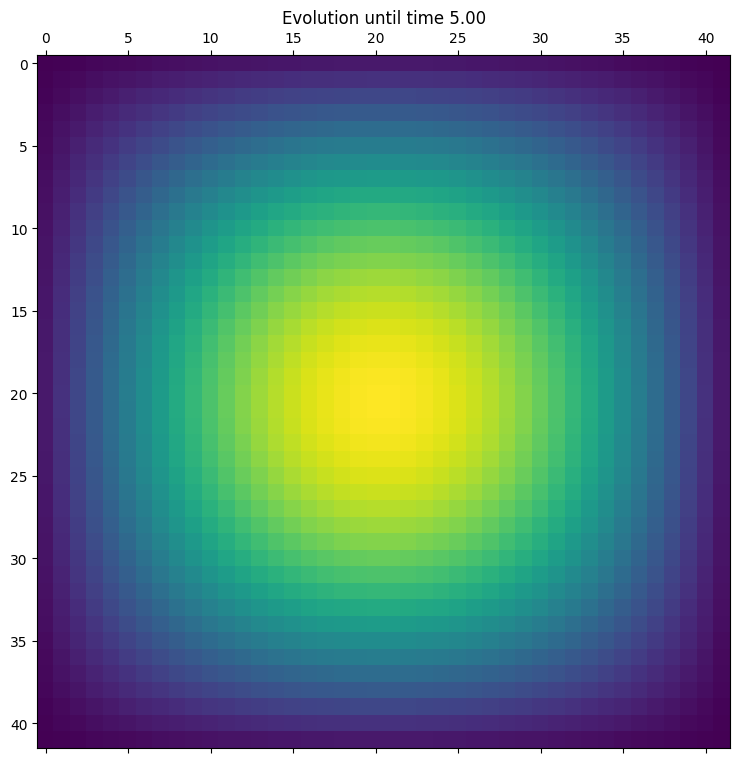

In [23]:
figure, axes = plt.subplots(1, 1, figsize=(12, 9))
line = axes.matshow(f)
# 2. initialize the line objects
def init():
    # axes.set_xlim(x.min(), x.max())
    # axes.set_ylim(0., 1.)
    # axes.grid()
    # axes.set_xlabel('space')
    # axes.set_ylabel('u')
    return axes

# 3. animate function
def animate(i):
    axes.cla()
    axes.matshow(sol.y[:, i].reshape(f.shape))
    # print(sol.y[:,i])
    axes.set_title(f'Evolution until time {sol.t[i]:.2f}')
    #    figure.suptitle(f'Evolution until time {sol.t[i]:.2f}')
    return axes

# 4. call animation
fancy_plot = animation.FuncAnimation(figure, animate, frames=sol.t.size,
                                     init_func=init, blit=False)

HTML(fancy_plot.to_jshtml())